In [12]:
######### Programming Questions ################

###### Importing modules ######
import numpy as np
import sys
import warnings
import pandas as pd
import pyodbc 
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from pandas.io import sql
from sklearn.ensemble import RandomForestRegressor
import sqlite3 as lite
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    


In [13]:
# Read the csv file
# Question#2 - 2a. -- Reads data into pandas dataframe 
df=pd.read_csv('TTI_programming_question.csv')
df=pd.DataFrame(df)
df.head()

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255


In [14]:
#Questio#2 - 2b -- Compute min, max, average, standard deviation, and the geometric mean for X, Y

print("Compute min, max, average, standard deviation, and the geometric mean for X, Y")
print("-------------------------------------------------------------------------------")
# Minimum for X
df.X.min()
print("Minimum of X: {}".format(df.X.min()))

# Minimum for Y
df.Y.min()
print("Minimum of Y: {}".format(df.Y.min()))

# Maximum for X
df.X.max()
print("Maximum of X: {}".format(df.X.max()))

# Maximum for Y
df.Y.max()
print("Maximum of Y: {}".format(df.Y.max()))

# Standard Deviation for X
df.X.std()
print("Standard Deviation of X: {}".format(df.X.std()))

# Standard Deviation for Y
df.Y.std()
print("Standard Deviation of Y: {}".format(df.Y.std()))

# Geometric Mean for X and Y
print("Geometric Mean of X: {}".format(stats.gmean(df.X)))
print("Geometric Mean of Y: {}".format(stats.gmean(df.Y)))



Compute min, max, average, standard deviation, and the geometric mean for X, Y
-------------------------------------------------------------------------------
Minimum of X: 0.21
Minimum of Y: 1.124
Maximum of X: 10.02
Maximum of Y: 7.497999999999999
Standard Deviation of X: 2.672921110438216
Standard Deviation of Y: 1.7345914411692966
Geometric Mean of X: 4.495324361202806
Geometric Mean of Y: 3.1083098050605766


In [15]:
#Question2 - 2c How would you write out the dataframe to a SQL table? 
# Using SQLite
print("2c -- How would you write out the dataframe to a SQL table?")
print("-----------------------------------------------------------")

con = lite.connect('TTI.db')
df=pd.read_csv('TTI_programming_question.csv')
df.to_sql('TTI', con, if_exists='append', index=False, index_label=None)
df1 = pd.read_sql_query('select * from "TTI"',con)
print(df1)


2c -- How would you write out the dataframe to a SQL table?
-----------------------------------------------------------
    Class PartNo      X      Y
0     AAA   X135   0.21  1.124
1     AAA   X126   0.21  1.179
2    EBHA   X195   0.32  1.191
3    EBHA   X194   0.82  1.249
4     AAA   X139   0.81  1.255
5    EBHA   X164   1.21  1.388
6    EBHA   X184   1.01  1.402
7     AAA   X124   1.12  1.433
8    EBHA   X196   1.80  1.511
9    EBGB   X110   1.81  1.528
10    AAA   X148   1.51  1.533
11    AAA   X142   2.41  1.628
12   EBHA   X185   2.12  1.648
13    AAA   X137   2.12  1.660
14   EBHA   X168   2.31  1.662
15    AAA   X121   2.51  1.684
16    AAA   X134   2.61  1.686
17   EBGB   X102   2.51  1.704
18    AAA   X154   2.61  1.790
19   EBHA   X173   2.51  1.827
20   EBGB   X106   2.91  1.883
21   EBHA   X199   2.91  1.887
22   EBGB   X119   3.11  1.915
23    AAA   X125   3.21  1.931
24    AAA   X157   3.50  2.066
25   EBGB   X113   3.61  2.093
26   EBGB   X104   3.52  2.104
27   EBGB   

2d -- Generates a predictive model of Y based on X
--------------------------------------------------


Text(0.5,1,'X vs Y')

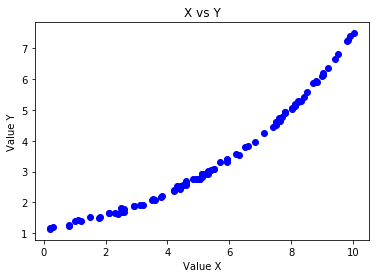

In [16]:
#Question2 - 2d Generates a predictive model of Y based on X (submit code and results); describe your approach
print("2d -- Generates a predictive model of Y based on X")
print("--------------------------------------------------")
x=df.X
y=df.Y
plt.scatter(x, y,  color='blue')
plt.xlabel('Value X')
plt.ylabel('Value Y')
plt.title('X vs Y')

In [17]:
'''
Looking at the current plot. Polynomial Regression analysis would be ideal to perform since the relation
between and x and y is non-linear. 

'''



# Reshaping x and y 
x=x.reshape(-1,1)
y=y.reshape(-1,1)

'''
Polynomial Regression
---------------------

We would choose a degree of the polynomial and convert it into a suitable form to be used by the linear regressor.
sklearn module-polynomial featues is used for polynomial regression

Linear Regression
------------------
Here we are trying to model Y based on X values. We are using Ordinary Least Squares(OLS) to model the data.
The modeling assumption is that for every possible value of "x", the quantity "y" is normally distributed 
with a mean that is linear in "x". It finds out that slope and intercept in such a way to minimize the sum 
of the squares of the differences between actual and estimated values of your predictor.
In statistical terms, minimizing mean squared error (MSE) or residual sum of squares (r2) is our model objective.

statsmodels api is one the python module through which we can implement the Oridinary Least Sqaure(OLS)
The module takes the data frame x values and y values and fit the model. The model is predicted using the X values.

The mean square of the model is - 3.008 and R-Square-Error - 0.93

'''
print("Degree      Residual Mean      R Sqaured Value")
for i in range(2,10):
    poly = PolynomialFeatures(degree = i)
    X_ = poly.fit_transform(x)
    model = sm.OLS(y,X_).fit()    
    predictions = model.predict(X_) # make the predictions by the model

    # Print out the statistics
    #print(model.summary())
    
    print(i,"    ",model.mse_resid," ",model.rsquared)

    

Degree      Residual Mean      R Sqaured Value
2      0.006700500248849764   0.9978180270164286
3      0.0021041544049966807   0.9993218601814337
4      0.0019360688205975753   0.999382531505375
5      0.0018792067699814478   0.9994069752364474
6      0.0018500303966054272   0.9994223933033677
7      0.001866917895961943   0.9994233882962378
8      0.0018618413723171803   0.9994312066948188
9      0.0018168658684370306   0.9994510462162427


2e Assess the accuracy of your predictive model
------------------------------------------------
Residual Mean Squared Error: 0.0021041544049966807 
R Sqaure Value: 0.9993218601814337


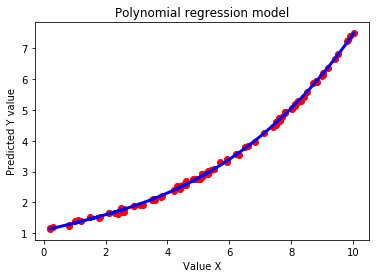

In [18]:
# Looking at the above residual mean squared and rsqaure value, degree of polynomial 3 would be ideal because 
# there is no much change after degree 3. 

# The Closer the rsquare value is to 1,  better the accuracy of analysis

# predicting value with degree 3
poly = PolynomialFeatures(degree = 3)
X_ = poly.fit_transform(x)
model = sm.OLS(y,X_).fit()    
predictions = model.predict(X_)

# plotting predicted values
plt.scatter(x, y, color='red')
plt.plot(x, predictions, color='blue', linewidth=3)
plt.xlabel('Value X')
plt.ylabel('Predicted Y value')
plt.title("Polynomial regression model")

#Question2 - 2e Assess the accuracy of your predictive model
#Accuracy
print("2e Assess the accuracy of your predictive model")
print("------------------------------------------------")

print("Residual Mean Squared Error: {} ".format(model.mse_resid))
print("R Sqaure Value: {}".format(model.rsquared))






Using extended costs to differentiate the margins: 

for no. of bins 3 - Printing bins to confirm that they are not overlapped
(3, 0) (0.02, 667.2) - bin 0
(3, 1) (667.55, 3211.25) - bin 1
(3, 2) (3250.0, 21634.12) - bin 2
total average margin difference across bins when num of bins is 3 = 0.2541232078193358
total average margin coefficient of variance when num of bins is 3 = 0.5131677303677615 

for no. of bins 4 - Printing bins to confirm that they are not overlapped
(4, 0) (0.02, 506.2) - bin 0
(4, 1) (2146.18, 6350.45) - bin 1
(4, 2) (507.0, 2110.25) - bin 2
(4, 3) (6535.98, 21634.12) - bin 3
total average margin difference across bins when num of bins is 4 = 0.15322684590540187
total average margin coefficient of variance when num of bins is 4 = 0.4622670406444143 

for no. of bins 5 - Printing bins to confirm that they are not overlapped
(5, 0) (0.02, 308.82) - bin 0
(5, 1) (1033.28, 2753.2) - bin 1
(5, 2) (309.5, 1032.05) - bin 2
(5, 3) (7230.0, 21634.12) - bin 3
(5, 4) (2784.1,

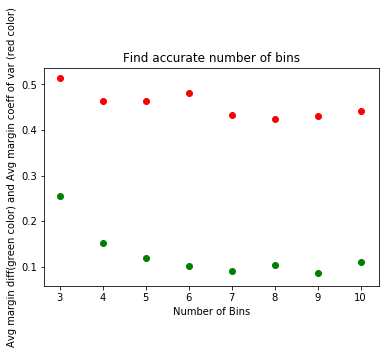

In [19]:
###### MODELLING QUESTION #######


#### Brief Description about approach ####

'''
 In general, we take all attributes for clustering, but for this problem, 
 considering all the attributes will result in decreasing cluster variance 
 based on all the attributes. So, to have clustering with minimum margin variance
 we can cluster either with extendedcost or margin. But, if we use margin 
 for clustering, then there is a chance for extended cost over lapping. 
 So, the best bet for this problem is to consider extended cost for clustering 
 and then checking margin variance for each bin to discover the accurate number of bins 
 with minimum margin variance.
 
 K-means algorithm is the best way to go ahead with clustering since it is faster compared to 
 other clustering methods like hierarchical clustering.  
 
'''


#### Importing required modules ####

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor


#### Reading dataset into pandas dataframe ####

df=pd.read_excel('ModelingDataSet.xlsx')
df.head()


# Using k-means to cluster dataset based on 'Extended Cost' for k-values between 3 and 10

b=df.extendedCost.values.reshape(df.extendedCost.shape[0],1) ## (Reshaping data)
    
print("Using extended costs to differentiate the margins: \n")
for i in range(3,11):
    print("for no. of bins",i,"-","Printing bins to confirm that they are not overlapped")
    va=av=np.array([])
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(b)
    df['binE']=model.labels_
    for k in range(0,i):
        dfq=df[df.binE==k]
    
        ## calculating minimum and maximum of each bin to check overlapping of bins
        (mi,mx)=dfq.extendedCost.min(),dfq.extendedCost.max()
        print((i,k),(mi,mx),'-', "bin",k)
    
        ### average margin of each bin
        av=np.append(av,dfq.Margin.sum()/dfq.Margin.size)
    
        ### coefficient of variance of each bin 
        va=np.append(va,dfq.Margin.std()/dfq.Margin.mean())

                
    ### average margin difference across bins    
    dif=np.diff(av)
    dif=np.abs(dif)
    dif=dif.sum()/(dif.size-1)
    print("total average margin difference across bins when num of bins is", i ,'=', dif)
    
    ### Average coefficient of variance of all bins
    va = va.sum()/va.size
    print("total average margin coefficient of variance when num of bins is", i ,'=',va,"\n")
    
    ##### Plotting number of bins vs average margin difference across bins
    p1=plt.scatter(i, dif, c = 'green')
    
    
    ##### Plotting number of bins vs average margin coefficient of variance of all bins
    
    p2=plt.scatter(i, va, c = 'red')
    
    plt.xlabel ( "Number of Bins")
    plt.ylabel ( "Avg margin diff(green color) and Avg margin coeff of var (red color)")
    plt.title ("Find accurate number of bins")
    

    
    '''
    CONCLUSION:
    
    By looking at the above plot, we can say that 8 bins will be the most accurate one 
    for this dataset since it has less variance and more margin difference. We can conclude 
    that it has less variance because coefficient of variance and variance are implicitly
    related to eachother.
    '''
    
    
    

Columns and their scores:
[(0.7199, 'Revenue'), (0.0306, 'Unit_cost'), (0.0177, 'Quantity')]
Using Revenue to differentiate the margins: 

for no. of bins 3 - Printing bins to confirm that they are not overlapped
(3, 0) (4.89, 1216.0) - bin 0
(3, 1) (1217.71, 6239.8) - bin 1
(3, 2) (6375.6, 28938.0) - bin 2
total average margin difference across bins when num of bins is 3 = 0.18867111307871468
total average margin coefficient of variance when num of bins is 3 = 0.6036026997929872 

for no. of bins 4 - Printing bins to confirm that they are not overlapped
(4, 0) (4.89, 656.25) - bin 0
(4, 1) (657.0, 2511.36) - bin 1
(4, 2) (7937.5, 28938.0) - bin 2
(4, 3) (2520.0, 7658.0) - bin 3
total average margin difference across bins when num of bins is 4 = 0.11039818985405632
total average margin coefficient of variance when num of bins is 4 = 0.6169377390691546 

for no. of bins 5 - Printing bins to confirm that they are not overlapped
(5, 0) (4.89, 404.7) - bin 0
(5, 1) (1252.1, 3180.0) - bin 1

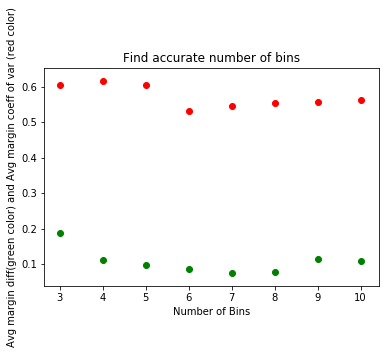

In [20]:
######  Column that can differentiate margins better ####
    
'''
    Since we have less number of columns, first I have elimiated 'transaction_id' as it 
    is just an unique identifier.
    
    This left me with unit_cost, quantity and revenue columns. Now, I have applied random
    forest algorithm to see how each of these columns is impacting margin
    
    
'''
    
    
### Random Forest Algorithm to predict important columns apart from Extended Cost

randomforest = RandomForestRegressor()

#splitting dataframe into target(margin) and data values
data = df.iloc[:, [1, 2, 3, 4]].values
target = df.iloc[:, 5].values

columns = ['Unit_cost', 'Quantity', 'Revenue']
randomforest.fit(data, target)
print ("Columns and their scores:")
print (sorted(zip(map(lambda x: round(x, 4), randomforest.feature_importances_), columns),reverse = True))



'''
By looking at scores, revenue would be better column in differentiating margins. Now, 
code below is used to see how to perform clustering based on Revenue.
'''


# Using k-means to cluster dataset based on 'Revenue' for k-values between 3 and 10

a=df.Revenue.values.reshape(df.Revenue.shape[0],1)# Reshaping data 
    
print("Using Revenue to differentiate the margins: \n")
for i in range(3,11):
    print("for no. of bins",i,"-","Printing bins to confirm that they are not overlapped")
    va=av=np.array([])
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(a)
    df['binE']=model.labels_
    for k in range(0,i):
        dfq=df[df.binE==k]
    
        ## calculating minimum and maximum of each bin to check overlapping of bins
        (mi,mx)=dfq.Revenue.min(),dfq.Revenue.max()
        print((i,k),(mi,mx),'-', "bin",k)
    
        ### average margin of each bin
        av=np.append(av,dfq.Margin.sum()/dfq.Margin.size)
    
        ### coefficient of variance of each bin 
        va=np.append(va,dfq.Margin.std()/dfq.Margin.mean())
        
                
    ### average margin difference across bins    
    dif=np.diff(av)
    dif=np.abs(dif)
    dif=dif.sum()/(dif.size-1)
    print("total average margin difference across bins when num of bins is", i ,'=', dif)
    
    ### Average coefficient of variance of all bins
    va = va.sum()/va.size
    print("total average margin coefficient of variance when num of bins is", i ,'=',va,"\n")
    

    ##### Plotting number of bins vs average margin difference across bins
    p1=plt.scatter(i, dif, c = 'green')
    
    
    ##### Plotting number of bins vs average margin coefficient of variance of all bins
    
    p2=plt.scatter(i, va, c = 'red')
    
    plt.xlabel ( "Number of Bins")
    plt.ylabel ( "Avg margin diff(green color) and Avg margin coeff of var (red color)")
    plt.title ("Find accurate number of bins")
    
    
    '''
    CONCLUSION:
    
    By looking at the above plot, we can say that 6 bins will be the most accurate one 
    for this dataset since it has less variance and more margin difference. We can conclude 
    that it has less variance because coefficient of variance and variance are implicitly
    related to eachother.
    '''